In [40]:
from math import sin
from math import pi
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
from numpy import argmax
from sklearn.gaussian_process import GaussianProcessRegressor

In [4]:
# the objective function
def objective(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + noise

In [12]:
# defining a grid based sample of the domain [0,1]
X = np.arange(0,1,0.01)

In [23]:
# sample the domain without noise
y  = [objective(x, 0) for x in X]

In [24]:
# sample the domain with noise
ynoise = [objective(x) for x in X]

In [32]:
# find the best result
xi = argmax(y)
print(f"Optimal: x = {X[xi]}, y = {y[xi]}")

Optimal: x = 0.9, y = 0.81


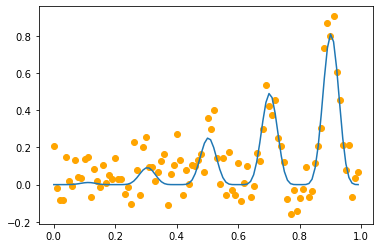

In [38]:
# plot the points with noise
plt.scatter(X, ynoise, c='orange')
plt.plot(X, y)
plt.show()

In [41]:
# Surrogate Function
# transforms input examples into output score
# probabilistically it is the conditional probability of an 
# objective function(f), given the available data (D) or
# P(f|D)

# Define the model
model = GaussianProcessRegressor()

In [67]:
# fit the model
X = X.reshape(100,1)
model.fit(X, y)

GaussianProcessRegressor()

In [68]:
yhat = model.predict(X, return_std=True)

C:\Users\usama\anaconda3\envs\Heroku\lib\site-packages\sklearn\gaussian_process\_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [71]:
# surrogate or opproximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [ ]:
# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    plt.scatter(X,y)
    # line plot of surrogte function cross domain
    Xsamples = asarray(arange(0,1,0.001))
    Xsamples = Xsamples.reshape(len(Xsamples),1)
    Xsamples, _ = surrogate(model, Xsamples)
    plt.plot(Xsamples, ysamples)
    # show 